In [296]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime


## Importing train Dataset and Test dataset

In [297]:
lincense_dataset = pd.read_csv("train_file.csv")
test_lincense_dataset = pd.read_csv("test_file.csv")

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
lincense_dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


### Basic information about dataset

In [299]:
lincense_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
ID                                   85895 non-null object
LICENSE ID                           85895 non-null int64
ACCOUNT NUMBER                       85895 non-null int64
SITE NUMBER                          85895 non-null int64
LEGAL NAME                           85895 non-null object
DOING BUSINESS AS NAME               85894 non-null object
ADDRESS                              85895 non-null object
CITY                                 85895 non-null object
STATE                                85895 non-null object
ZIP CODE                             85864 non-null object
WARD                                 36194 non-null float64
PRECINCT                             29194 non-null float64
WARD PRECINCT                        36195 non-null object
POLICE DISTRICT                      31883 non-null float64
LICENSE CODE                         85895 non-null int64
LICENSE

In [300]:
lincense_dataset.shape

(85895, 32)

In [301]:
my_submission = pd.DataFrame({'ID': test_lincense_dataset.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


## Visualizing dataset for correlation

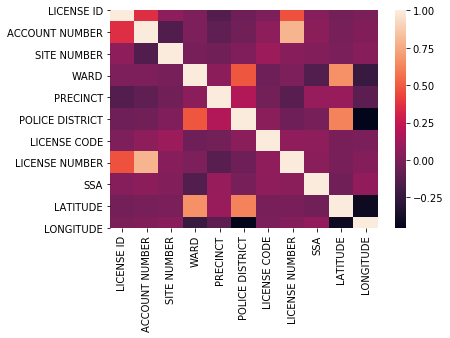

In [302]:
sns.heatmap(lincense_dataset.corr())

## Finding some information regarding columns

In [303]:
lincense_dataset.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [304]:
# find info about target variable

lincense_dataset['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

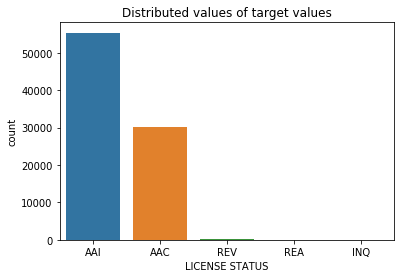

In [305]:
plt.title('Distributed values of target values')
sns.countplot(lincense_dataset['LICENSE STATUS'])

### Checking about null values in dataset

In [306]:
lincense_dataset.isna().sum()     # in train data

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [307]:
# In test data
test_lincense_dataset.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [308]:
lincense_dataset.nunique()      # In train dataset - checking for unique values

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [309]:
test_lincense_dataset.nunique()    # In test dataset - checking for unique values

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

## Data Cleaning

In [310]:
# Dropping columns 
# 1) APPLICATION CREATED DATE 
# 2) SSA 
# 3) LICENSE ID
# 4) ADDRESS 
# 5) ID
# 6) LOCATION  

unimportant_columns = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION']

In [311]:
lincense_dataset = lincense_dataset.drop(unimportant_columns, axis=1)
test_lincense_dataset = test_lincense_dataset.drop(unimportant_columns, axis=1)

### Converting string Date-time into python Date-time to get year and month

* Using date time because it is highly correlated with the License status.

In [312]:
def convert_dateTime(string_dateTime):
    for i in string_dateTime:
        lincense_dataset[i] = pd.to_datetime(lincense_dataset[i])
        test_lincense_dataset[i] = pd.to_datetime(test_lincense_dataset[i])
        

In [313]:
string_dateTime = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE','DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
convert_dateTime(string_dateTime)

In [314]:
# Obtain year and month from datetime columns

def getYear(new_col, columns):
    lincense_dataset[new_col] = lincense_dataset[columns].apply(lambda x: x.year)
    test_lincense_dataset[new_col] = lincense_dataset[columns].apply(lambda x:x.year)
    
def getMonth(new_col, columns):
    lincense_dataset[new_col] = lincense_dataset[columns].apply(lambda x: x.month)
    test_lincense_dataset[new_col] = lincense_dataset[columns].apply(lambda x:x.month)

In [315]:
getYear('PAYMENT YEAR', 'PAYMENT DATE')
getMonth('PAYMENT MONTH', 'PAYMENT DATE')
getYear('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
getYear('DATE ISSUED YEAR', 'DATE ISSUED')
getYear('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
getYear('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
getYear('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
getYear('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

### Filling the null values by mean, None , 0

    1) latitude and longitude
    2) PAYMENT DATE 
    3) APPLICATION REQUIREMENTS COMPLETE 
    4) LICENSE TERM EXPIRATION DATE 
    5) DATE ISSUED 
    6) LICENSE TERM EXPIRATION YEAR
    7) LICENSE TERM START DATE 
    8) LICENSE TERM START YEAR 
    9) LICENSE APPROVED FOR ISSUANCE 
    10) LICENSE STATUS CHANGE DATE
    11) LEGAL NAME 
    12) DOING BUSINESS AS NAME


In [316]:
def location_mean(loc_list):
    for i in loc_list:
        lincense_dataset[i] = lincense_dataset[i].fillna(lincense_dataset[i].mean())
        test_lincense_dataset[i] = test_lincense_dataset[i].fillna(test_lincense_dataset[i].mean())
        

loc_list = ['LATITUDE', 'LONGITUDE']
location_mean(loc_list)

In [317]:
# We are rounding the values because we want that values in integer from.

def another_dates_values(doc_list):
    for i in doc_list:
        lincense_dataset[i] = lincense_dataset[i].fillna(round(lincense_dataset[i].mean()))
        test_lincense_dataset[i] = test_lincense_dataset[i].fillna(round(test_lincense_dataset[i].mean()))


doc_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR','APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
another_dates_values(doc_list)

In [318]:
# now adding None to names of person and business

def nameValues(doc2_list):
    for i in doc2_list:
        lincense_dataset[i] = lincense_dataset[i].fillna('None')
        test_lincense_dataset[i] = test_lincense_dataset[i].fillna('None')

doc2_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME','ZIP CODE']
nameValues(doc2_list)

In [319]:
def nilvalue(doc3_list):
    for i in doc3_list:
        lincense_dataset[i] = lincense_dataset[i].fillna(0)
        test_lincense_dataset[i] = test_lincense_dataset[i].fillna(0)
    
doc3_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH', 'WARD PRECINCT', 'LICENSE NUMBER']
nilvalue(doc3_list)

In [320]:
lincense_dataset.isna().sum()   # checking again null values and some of have but we do not need that columns

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        0
CITY                                          0
STATE                                         0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
WARD PRECINCT                                 0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE           

## Now reducing feature converting into 1 or 2 because it has similar behavior

* collecting info from **legal name** and **doing business as name** columns and converting into because it has same behavior. So it will be more correlated with the target value.

In [321]:
# upper because easily can get the values like LIC, INC etc.

lincense_dataset['LEGAL NAME'].apply(lambda x: x.upper())
lincense_dataset['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_lincense_dataset['LEGAL NAME'].apply(lambda x: x.upper())
test_lincense_dataset['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_lincense_dataset.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,IL,60610,42.0,67.0,42-67,...,41.890047,-87.637467,2002.0,8.0,2002.0,2006,2003.0,2002.0,2002.0,2009.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,IL,60636,16.0,5.0,16-5,...,41.786485,-87.676665,2005.0,11.0,2005.0,2006,2006.0,2005.0,2006.0,2006.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,IL,60605,4.0,8.0,4-8,...,41.868269,-87.625695,2009.0,7.0,2009.0,2009,2011.0,2009.0,2009.0,2009.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,IL,60827,9.0,33.0,9-33,...,41.655762,-87.608686,2004.0,2.0,2004.0,2004,2005.0,2004.0,2004.0,2009.0
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,IL,60632,15.0,26.0,15-26,...,41.816969,-87.699785,2008.0,6.0,2008.0,2008,2010.0,2008.0,2008.0,2009.0


In [322]:
lincense_dataset['LICENSE VALIDITY'] = abs(lincense_dataset['LICENSE TERM EXPIRATION YEAR'] - lincense_dataset['LICENSE TERM START YEAR'])
test_lincense_dataset['LICENSE VALIDITY'] = abs(test_lincense_dataset['LICENSE TERM EXPIRATION YEAR'] - test_lincense_dataset['LICENSE TERM START YEAR'])
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
# Dropping columns which will be of no use for our model
lincense_dataset = lincense_dataset.drop(col_list, axis=1)
test_lincense_dataset = test_lincense_dataset.drop(col_list, axis=1)

In [323]:
lincense_dataset['LEGAL NAME'] = lincense_dataset['LEGAL NAME'].str.replace('.', '', regex=False)
lincense_dataset['DOING BUSINESS AS NAME'] = lincense_dataset['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

test_lincense_dataset['LEGAL NAME'] = test_lincense_dataset['LEGAL NAME'].str.replace('.', '', regex=False)
test_lincense_dataset['DOING BUSINESS AS NAME'] = test_lincense_dataset['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [324]:
lincense_dataset['LEGAL TYPE'] = 'PSB'   # Private supported Business
test_lincense_dataset['LEGAL TYPE'] = 'PSB'

In [325]:
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('INC'), 'INC', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', lincense_dataset['LEGAL TYPE'])

test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('INC'), 'INC', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_lincense_dataset['LEGAL TYPE'])

In [326]:
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('LLC'), 'LLC', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', lincense_dataset['LEGAL TYPE'])

test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('LLC'), 'LLC', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_lincense_dataset['LEGAL TYPE'])

In [327]:
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('CO'), 'CORP', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('CORP'), 'CORP', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', lincense_dataset['LEGAL TYPE'])

test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('CO'), 'CORP', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('CORP'), 'CORP', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_lincense_dataset['LEGAL TYPE'])

In [328]:
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('LTD'), 'LTD', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['LEGAL NAME'].str.contains('LIMITED'), 'LTD', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', lincense_dataset['LEGAL TYPE'])
lincense_dataset['LEGAL TYPE'] = np.where(lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', lincense_dataset['LEGAL TYPE'])

test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('LTD'), 'LTD', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_lincense_dataset['LEGAL TYPE'])
test_lincense_dataset['LEGAL TYPE'] = np.where(test_lincense_dataset['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_lincense_dataset['LEGAL TYPE'])

In [329]:
lincense_dataset['LEGAL TYPE'].value_counts()

CORP    27765
PSB     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

## License description have same type of different level . So, What I did is replace different level with one type and Might me correlated with target value

In [330]:
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
lincense_dataset['LICENSE DESCRIPTION'] = lincense_dataset['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [331]:
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_lincense_dataset['LICENSE DESCRIPTION'] = test_lincense_dataset['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [332]:
lincense_dataset['LICENSE DESCRIPTION'].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler                                      3782
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Affiliation                                     1
Indoor Special Event                            1
Name: LICENSE DESCRIPTION, Length: 92, dtype: int64

In [333]:
col_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME']
# Dropping columns which will be of no use for our model
lincense_dataset = lincense_dataset.drop(col_list, axis=1)
test_lincense_dataset = test_lincense_dataset.drop(col_list, axis=1)


## Encoding the non-numerical values for model to predict it correctly.

In [334]:
lincense_dataset["LICENSE STATUS"] = lincense_dataset["LICENSE STATUS"].replace('AAI', 0)
lincense_dataset["LICENSE STATUS"] = lincense_dataset["LICENSE STATUS"].replace('AAC', 1)
lincense_dataset["LICENSE STATUS"] = lincense_dataset["LICENSE STATUS"].replace('REV', 2)
lincense_dataset["LICENSE STATUS"] = lincense_dataset["LICENSE STATUS"].replace('REA', 3)
lincense_dataset["LICENSE STATUS"] = lincense_dataset["LICENSE STATUS"].replace('INQ', 4)

In [335]:
lincense_dataset["LICENSE STATUS"]

0        0
1        1
2        0
3        0
4        0
        ..
85890    1
85891    0
85892    0
85893    1
85894    1
Name: LICENSE STATUS, Length: 85895, dtype: int64

In [336]:
def encodedValues(columnsValue):
    for i in columnsValue.columns:
        if columnsValue[i].dtypes=='object':
            print(i, "done")
            mask = ~columnsValue[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                columnsValue[i][mask] = label_encoder.fit_transform(columnsValue[i][mask])
                columnsValue[i] = columnsValue[i].astype(int)
            except Exception as e:
                print(i,e)
    return columnsValue



lincense_dataset = encodedValues(lincense_dataset)
test_lincense_dataset = encodedValues(test_lincense_dataset)

CITY done
STATE done
ZIP CODE done
ZIP CODE argument must be a string or number
WARD PRECINCT done
WARD PRECINCT argument must be a string or number
LICENSE DESCRIPTION done
APPLICATION TYPE done
CONDITIONAL APPROVAL done
LEGAL TYPE done
CITY done
STATE done


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ZIP CODE done
ZIP CODE argument must be a string or number
WARD PRECINCT done
WARD PRECINCT argument must be a string or number
LICENSE DESCRIPTION done
APPLICATION TYPE done
CONDITIONAL APPROVAL done
LEGAL TYPE done


In [337]:
encoder = LabelEncoder()
lincense_dataset["WARD PRECINCT"] = encoder.fit_transform(lincense_dataset["WARD PRECINCT"].astype(str))
test_lincense_dataset["WARD PRECINCT"] = encoder.fit_transform(test_lincense_dataset["WARD PRECINCT"].astype(str))

lincense_dataset["ZIP CODE"] = encoder.fit_transform(lincense_dataset["ZIP CODE"].astype(str))
test_lincense_dataset["ZIP CODE"] = encoder.fit_transform(test_lincense_dataset["ZIP CODE"].astype(str))

In [338]:
lincense_dataset.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,32811,1,193,16,1559,22.0,28.0,689,10.0,1010,...,-87.714618,0,2002.0,8.0,2002.0,2006,2002.0,2009.0,1.0,4
1,262311,29,193,16,1548,33.0,23.0,1230,17.0,1315,...,-87.699626,1,2005.0,11.0,2005.0,2006,2006.0,2006.0,1.0,1
2,345008,1,466,16,1025,0.0,0.0,1,0.0,1011,...,-87.681165,0,2009.0,7.0,2009.0,2009,2009.0,2009.0,2.0,1
3,273121,1,585,16,1329,0.0,0.0,1,0.0,1010,...,-87.681165,0,2004.0,2.0,2004.0,2004,2004.0,2009.0,1.0,0
4,213785,1,1145,16,1095,0.0,0.0,1,0.0,1010,...,-87.681165,0,2008.0,6.0,2008.0,2008,2008.0,2009.0,2.0,4


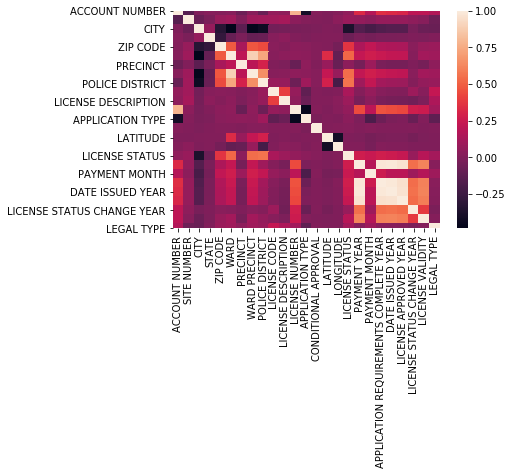

In [339]:
sns.heatmap(lincense_dataset.corr())

# now we are seeing columns are very correlated with each other

In [340]:
lincense_dataset['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

#### Major Problem -- Target value is unbalanced -- AAI , AAC have more values than REV,REA,INQ. So, Model will more baised on AAI and AAC values that means high skewed 

#### So, The first task is to make target value in balance form.
#### We can make this in normal/Gaussian distribution with shuffling the data before creating new samples data


In [341]:
lincense_dataset = lincense_dataset.sample(frac=1)

# Amount of fraud classes in proportion.
fraudValues = lincense_dataset[lincense_dataset['LICENSE STATUS'] == 4]
pendingValues = lincense_dataset[lincense_dataset['LICENSE STATUS'] == 3]
acceptedValues = lincense_dataset[lincense_dataset['LICENSE STATUS'] == 2]

nonFraudValues = lincense_dataset[lincense_dataset['LICENSE STATUS'] == 1][:310]
nonAcceptedValues = lincense_dataset[lincense_dataset['LICENSE STATUS'] == 0][:320]

normalDistributedValues = pd.concat([fraudValues, pendingValues, acceptedValues, nonFraudValues, nonAcceptedValues, fraudValues,
                                  fraudValues, fraudValues, fraudValues,pendingValues, pendingValues,  fraudValues, pendingValues])

# Shuffle dataframe rows
new_license_dataset = normalDistributedValues.sample(frac=1, random_state=42)

new_license_dataset.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
41332,373264,1,193,16,1598,28.0,0.0,934,0.0,1006,...,-87.754433,2,2014.0,6.0,2014.0,2014,2014.0,2016.0,2.0,1
68823,6085,1,193,16,1552,21.0,72.0,664,6.0,1006,...,-87.653788,2,2006.0,8.0,2006.0,2006,2006.0,2007.0,1.0,1
11679,275831,2,193,16,1604,26.0,14.0,833,14.0,1010,...,-87.710117,0,2009.0,11.0,2009.0,2009,2009.0,2009.0,2.0,4
38591,333130,1,193,16,1591,45.0,7.0,1875,16.0,1524,...,-87.751610,2,2008.0,9.0,2008.0,2009,2009.0,2010.0,2.0,1
56018,201245,1,193,16,1526,27.0,1.0,877,12.0,1470,...,-87.648229,2,2007.0,5.0,2007.0,2007,2007.0,2007.0,1.0,4


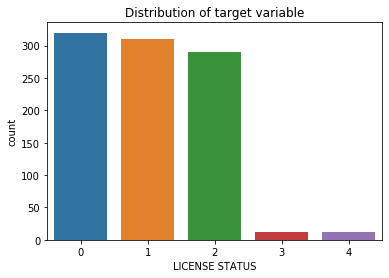

In [342]:
plt.title('Distribution of target variable')
sns.countplot(new_license_dataset['LICENSE STATUS'])
plt.show()

In [343]:
new_license_dataset['LICENSE STATUS'].value_counts()

0    320
1    310
2    290
4     12
3     12
Name: LICENSE STATUS, dtype: int64

#### AS we can see now that data is now seeing more balance than previous values

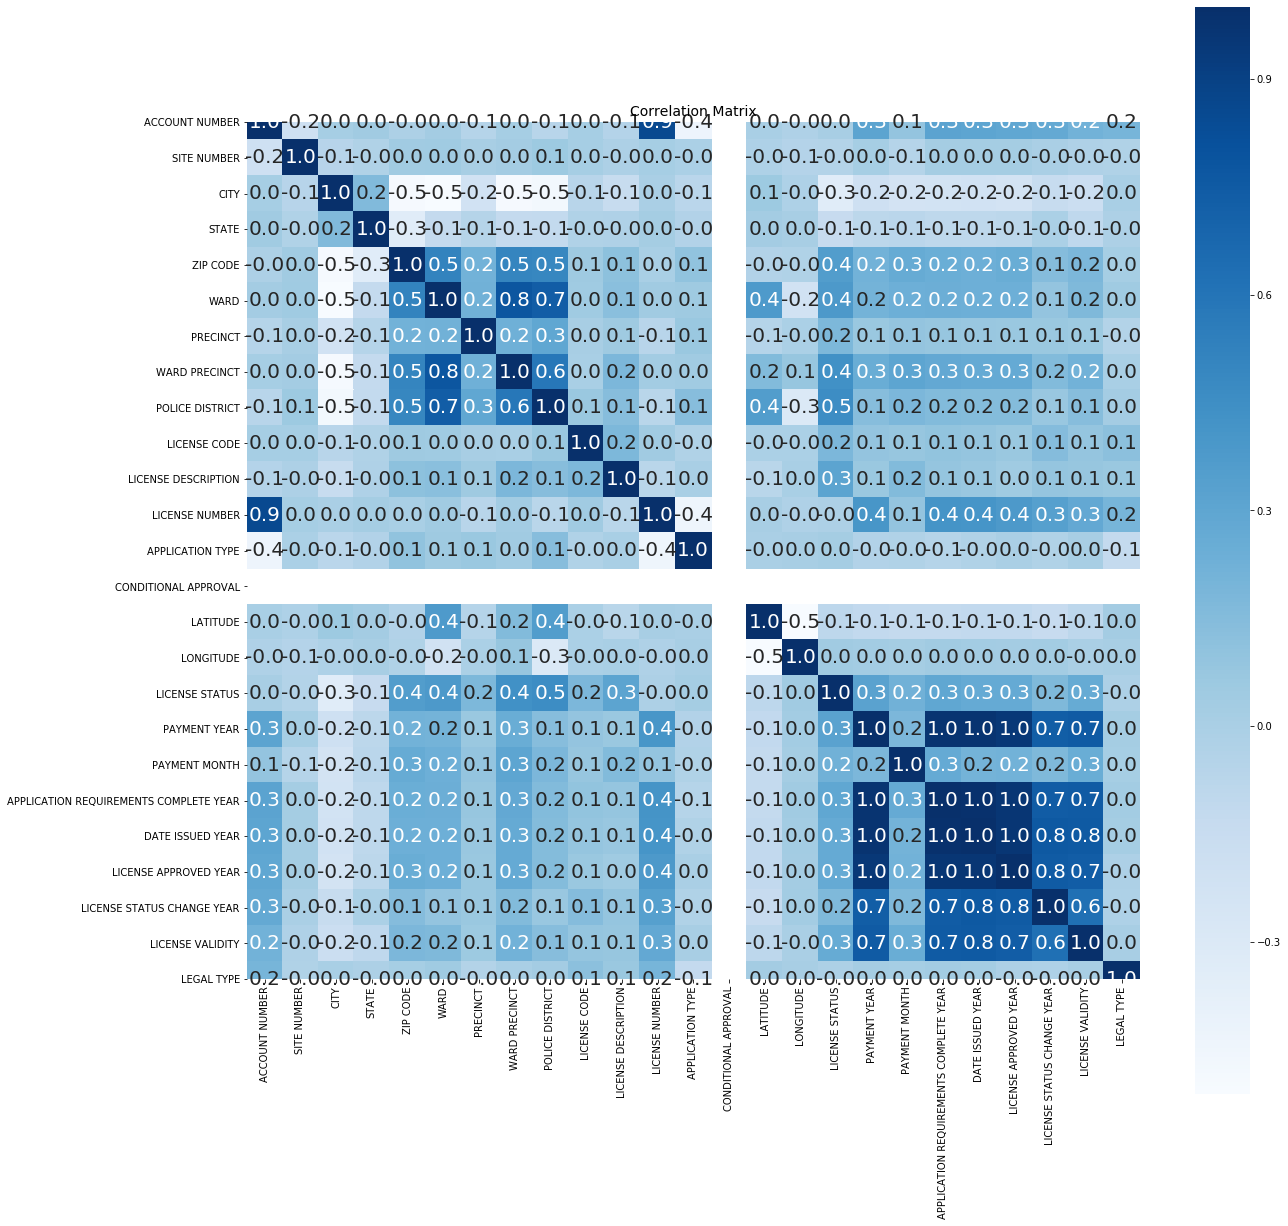

In [344]:
plt.figure(figsize=(20,20))
sns.heatmap(new_license_dataset.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Correlation Matrix', fontsize=14)
plt.show()

## From above figure we can clear see that now more columns values are highly correlated with each other.

In [345]:
# Since all the years are highly correlated, we will consider the one that has the least missing values
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_license_dataset = new_license_dataset.drop(col_list, axis=1)
test_lincense_dataset = test_lincense_dataset.drop(col_list, axis=1)

### Model Building process

In [346]:
X = new_license_dataset.drop('LICENSE STATUS', axis=1)
y = new_license_dataset['LICENSE STATUS']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

### Logistic Regression

In [347]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

 
logreg.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
y_pred = logreg.predict(X_test)
# Calculating the accuracy, precision and the recall
logreg_percentage = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', logreg_percentage )


Total Accuracy :  58.33


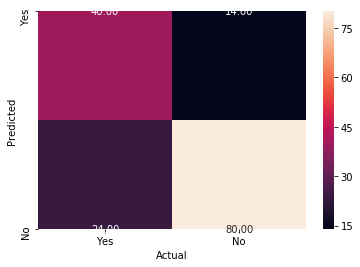

In [349]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
    
draw_cm(y_test,y_pred)

## Naive Bayes

In [350]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [351]:
y_pred = model.predict(X_test)
# Calculating the accuracy, precision and the recall
nb_percentage = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', nb_percentage )

Total Accuracy :  54.49


## Decision Tree Classifier

In [352]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = [{'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }]

grid_value = GridSearchCV(clf, parameters)
grid_value = grid_value.fit(X_train, y_train)

clf = grid_value.best_estimator_
clf.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [353]:
y_pred = clf.predict(X_train)

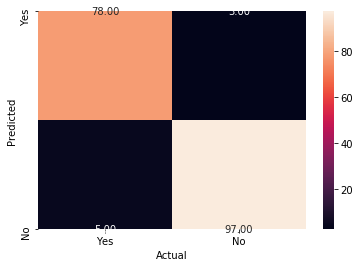

In [354]:
y_pred = clf.predict(X_test)
# Confusion matrix
draw_cm(y_test, y_pred)

In [355]:
DT_percentage = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', DT_percentage )

Total Accuracy :  83.97


## Random Forest 

In [356]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_value = GridSearchCV(rf, parameters)
grid_value = grid_value.fit(X_train, y_train)

rf = grid_value.best_estimator_
rf.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [357]:
y_pred = rf.predict(X_test)

rf_percentage = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', rf_percentage )

Total Accuracy :  83.01


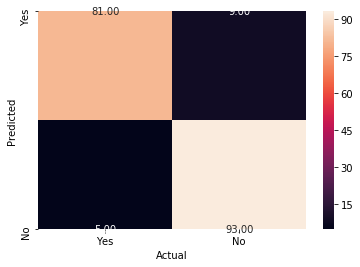

In [358]:
draw_cm(y_test, y_pred)

### Comparing My Four Models prediction

In [359]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Score':[logreg_percentage,nb_percentage,DT_percentage,rf_percentage]
})

models.sort_values(by='Score',ascending=False)

,Model,Score
2,Decision Tree,83.97
3,Random Forest,83.01
0,Logistic Regression,58.33
1,Naive Bayes,54.49


## As we can see that Random Forest giving better accuracy from rest of all


In [360]:
my_target_pred = rf.predict(test_lincense_dataset)

In [362]:
my_submission['LICENSE STATUS'] = my_target_pred
my_submission.shape

(57239, 2)

In [363]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [364]:
my_submission.to_csv('submission_file.csv', index=False)